In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/mhealth_full.csv'
df= pd.read_csv(path)
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


    0: 'Null',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'

In [5]:
df_activity_1 = df[df['activity'] == 1]
df_activity_2 = df[df['activity'] == 2]
df_activity_3 = df[df['activity'] == 3]
df_activity_4 = df[df['activity'] == 4]
df_activity_5 = df[df['activity'] == 5]
df_activity_6 = df[df['activity'] == 6]
df_activity_7 = df[df['activity'] == 7]
df_activity_8 = df[df['activity'] == 8]
df_activity_9 = df[df['activity'] == 9]
df_activity_10 = df[df['activity'] == 10]
df_activity_11 = df[df['activity'] == 11]
df_activity_12 = df[df['activity'] == 12]

In [6]:
df = pd.concat([df_activity_1, df_activity_2, df_activity_3,
                df_activity_4, df_activity_5, df_activity_6, df_activity_7,
                df_activity_8, df_activity_9, df_activity_10, df_activity_11,df_activity_12])

In [7]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['activity']=label.fit_transform(df['activity'])

In [8]:
df.activity.value_counts()

0     30720
1     30720
2     30720
3     30720
4     30720
8     30720
9     30720
10    30720
6     29441
7     29337
5     28315
11    10342
Name: activity, dtype: int64

In [9]:
X = df.drop(['activity', 'subject'], axis=1)
y = df['activity']
# Scale full set of predictors
X_scaled = StandardScaler().fit_transform(X)

In [10]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1, stratify=  y)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((257396, 21), (85799, 21), (257396,), (85799,))

In [12]:
# Scale train/ test predictors based on training data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Create train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1,stratify=  y_train)

In [14]:
# Reformat the training data into sequence samples
# Source: https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)



In [15]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

y_val_array = np.array(y_val)
val_set = np.c_[X_val, y_val_array]


# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 25)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 25)
print(X_test.shape, y_test.shape)

X_val, y_val = split_sequences(val_set, 25)
print(X_val.shape, y_val.shape)

(193023, 25, 21) (193023,)
(85775, 25, 21) (85775,)
(64325, 25, 21) (64325,)


In [16]:
print(X_train.shape, y_train.shape)

(193023, 25, 21) (193023,)


In [17]:
# Convert output variables to categorical for CNN
y_train = to_categorical(y_train)
print(y_train.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

y_val = to_categorical(y_val)
print(y_val.shape)

(193023, 12)
(85775, 12)
(64325, 12)


In [18]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

25 21 12


# Training

# static CNN1

In [19]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 64)            4096      
                                                                 
 flatten (Flatten)           (None, 1472)              0         
                                                                 
 dense (Dense)               (None, 128)               188544    
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 194188 (758.55 KB)
Trainable params: 194188 (758.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
6032/6032 [==============================] - 39s 4ms/step - loss: 0.5660 - accuracy: 0.7976 - val_loss: 0.2967 - val_accuracy: 0.8882
Epoch 2/10
6032/6032 [==============================] - 27s 4ms/step - loss: 0.2264 - accuracy: 0.9155 - val_loss: 0.1900 - val_accuracy: 0.9288
Epoch 3/10
6032/6032 [==============================] - 27s 5ms/step - loss: 0.1662 - accuracy: 0.9388 - val_loss: 0.1718 - val_accuracy: 0.9382
Epoch 4/10
6032/6032 [==============================] - 27s 4ms/step - loss: 0.1324 - accuracy: 0.9516 - val_loss: 0.1519 - val_accuracy: 0.9447
Epoch 5/10
6032/6032 [==============================] - 26s 4ms/step - loss: 0.1127 - accuracy: 0.9590 - val_loss: 0.1462 - val_accuracy: 0.9501
Epoch 6/10
6032/6032 [==============================] - 26s 4ms/step - loss: 0.0979 - accuracy: 0.9646 - val_loss: 0.1448 - val_accuracy: 0.9508
Epoch 7/10
6032/6032 [==============================] - 26s 4ms/step - loss: 0.0882 - accuracy: 0.9685 - val_loss: 0.1481 - val_ac

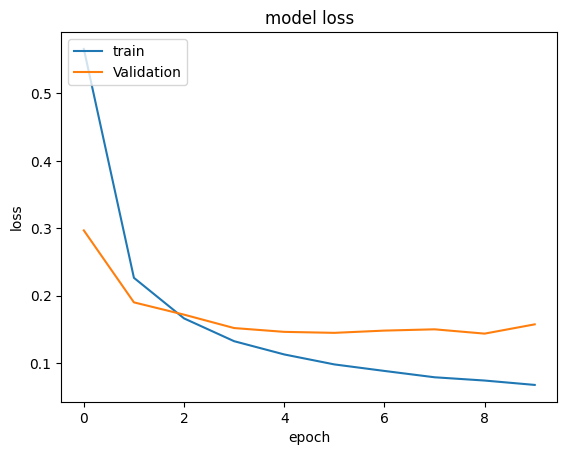

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

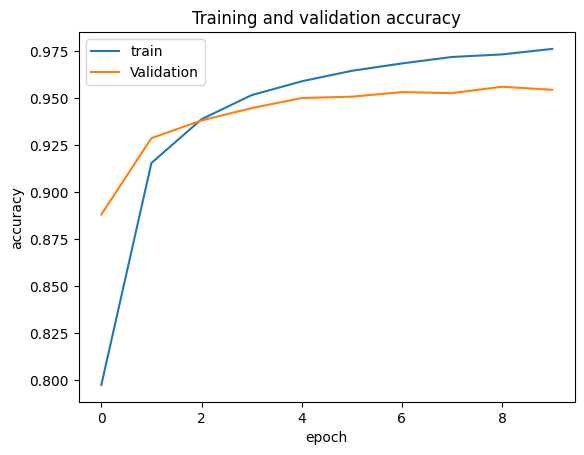

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [23]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

2681/2681 [==============================] - 4s 2ms/step


(85775, 1)

In [24]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]

# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_sequences(full_set, 25)
print(X_seq.shape, y_seq.shape)

(343171, 25, 21) (343171,)


In [26]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing',
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

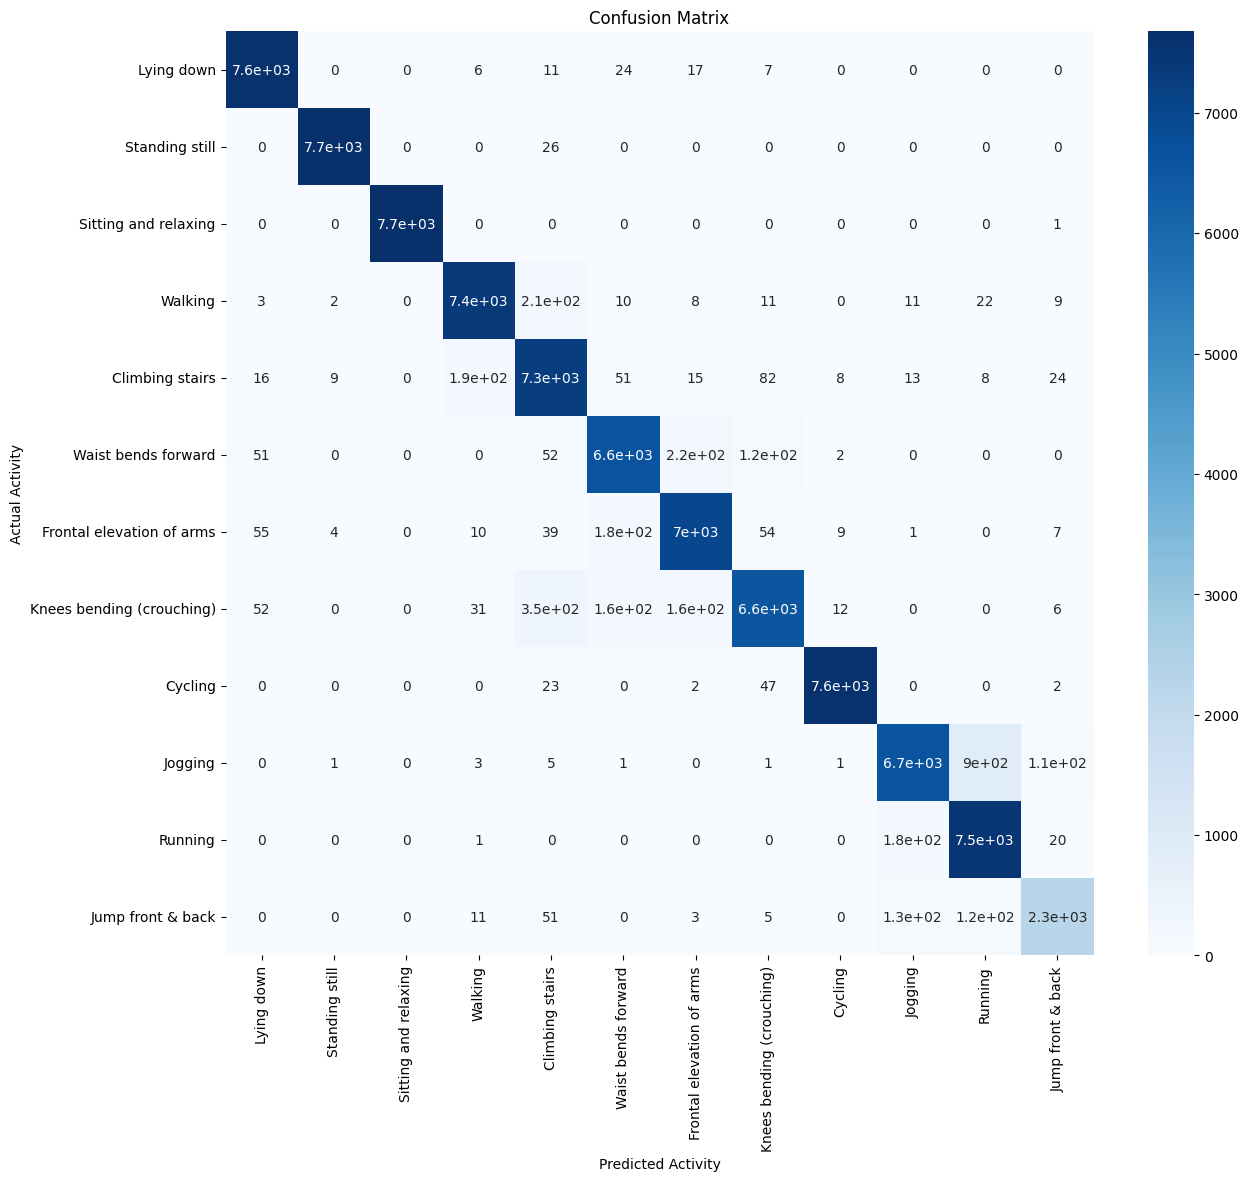

Accuracy Score: 95.3401%
Precision Score: 95.2558%
Recall Score: 94.8859%
F_1 Score: 95.0163%


In [27]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2

In [28]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 23, 64)            4096      
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 64)            12352     
                                                                 
 flatten_1 (Flatten)         (None, 1344)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               172160    
                                                                 
 dense_3 (Dense)             (None, 12)                1548      
                                                                 
Total params: 190156 (742.80 KB)
Trainable params: 190156 (742.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
6032/6032 [==============================] - 40s 6ms/step - loss: 0.5874 - accuracy: 0.7870 - val_loss: 0.2596 - val_accuracy: 0.9036
Epoch 2/10
6032/6032 [==============================] - 30s 5ms/step - loss: 0.1997 - accuracy: 0.9270 - val_loss: 0.1845 - val_accuracy: 0.9327
Epoch 3/10
6032/6032 [==============================] - 34s 6ms/step - loss: 0.1446 - accuracy: 0.9485 - val_loss: 0.1381 - val_accuracy: 0.9509
Epoch 4/10
6032/6032 [==============================] - 29s 5ms/step - loss: 0.1192 - accuracy: 0.9578 - val_loss: 0.1216 - val_accuracy: 0.9573
Epoch 5/10
6032/6032 [==============================] - 31s 5ms/step - loss: 0.1022 - accuracy: 0.9634 - val_loss: 0.1209 - val_accuracy: 0.9584
Epoch 6/10
6032/6032 [==============================] - 35s 6ms/step - loss: 0.0905 - accuracy: 0.9677 - val_loss: 0.1148 - val_accuracy: 0.9606
Epoch 7/10
6032/6032 [==============================] - 29s 5ms/step - loss: 0.0797 - accuracy: 0.9715 - val_loss: 0.1132 - val_ac

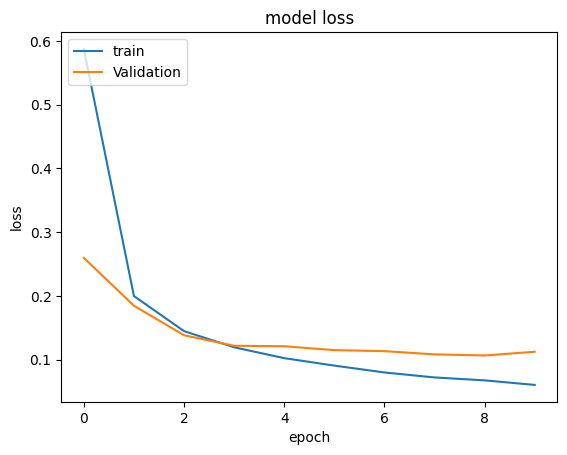

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

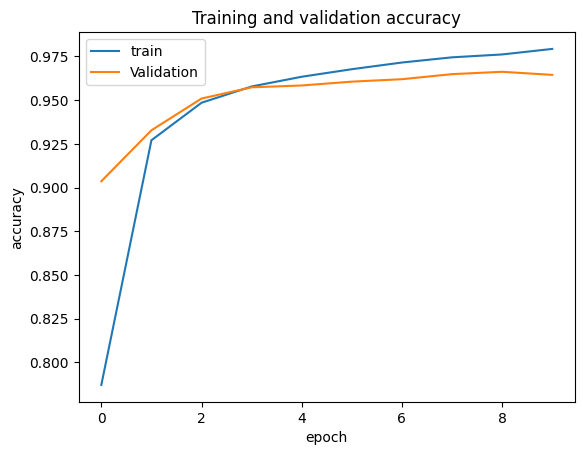

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [32]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

2681/2681 [==============================] - 6s 2ms/step


(85775, 1)

In [33]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]

# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_sequences(full_set, 25)
print(X_seq.shape, y_seq.shape)

(343171, 25, 21) (343171,)


In [35]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing',
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

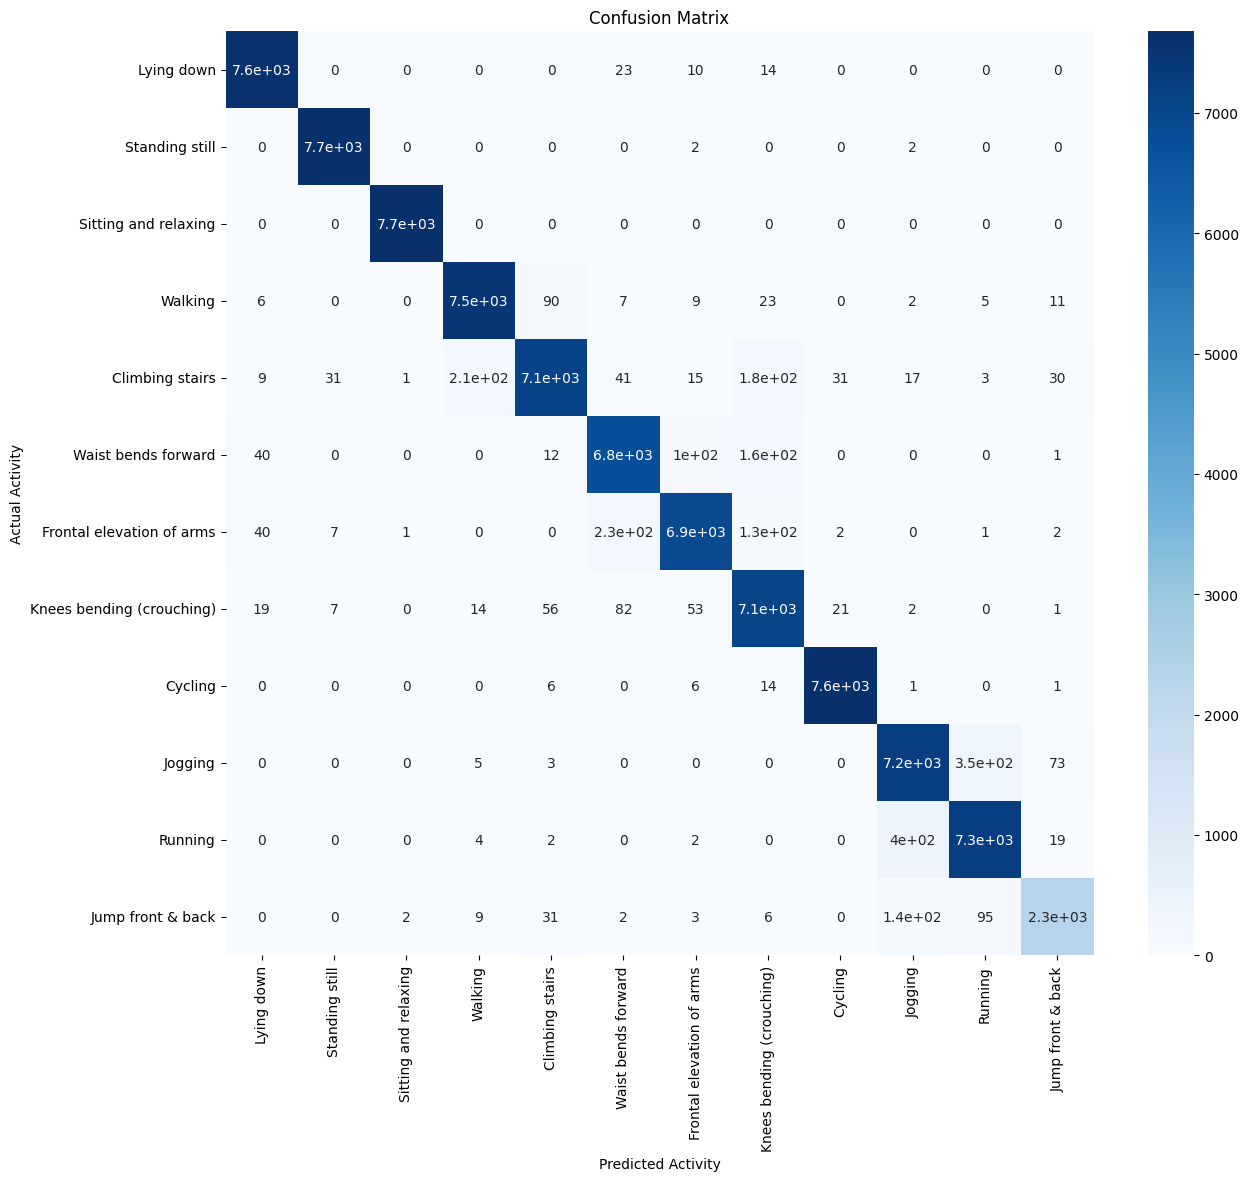

Accuracy Score: 96.5853%
Precision Score: 96.4511%
Recall Score: 96.1389%
F_1 Score: 96.2775%


In [36]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN3

In [37]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 23, 64)            4096      
                                                                 
 conv1d_4 (Conv1D)           (None, 21, 64)            12352     
                                                                 
 conv1d_5 (Conv1D)           (None, 19, 64)            12352     
                                                                 
 flatten_2 (Flatten)         (None, 1216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               155776    
                                                                 
 dense_5 (Dense)             (None, 12)                1548      
                                                                 
Total params: 186124 (727.05 KB)
Trainable params: 186

In [38]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
6032/6032 [==============================] - 35s 6ms/step - loss: 0.6985 - accuracy: 0.7403 - val_loss: 0.2859 - val_accuracy: 0.8933
Epoch 2/10
6032/6032 [==============================] - 33s 5ms/step - loss: 0.2109 - accuracy: 0.9234 - val_loss: 0.1811 - val_accuracy: 0.9341
Epoch 3/10
6032/6032 [==============================] - 32s 5ms/step - loss: 0.1478 - accuracy: 0.9480 - val_loss: 0.1453 - val_accuracy: 0.9496
Epoch 4/10
6032/6032 [==============================] - 32s 5ms/step - loss: 0.1198 - accuracy: 0.9587 - val_loss: 0.1126 - val_accuracy: 0.9609
Epoch 5/10
6032/6032 [==============================] - 32s 5ms/step - loss: 0.1026 - accuracy: 0.9645 - val_loss: 0.1011 - val_accuracy: 0.9653
Epoch 6/10
6032/6032 [==============================] - 32s 5ms/step - loss: 0.0909 - accuracy: 0.9689 - val_loss: 0.1132 - val_accuracy: 0.9616
Epoch 7/10
6032/6032 [==============================] - 32s 5ms/step - loss: 0.0819 - accuracy: 0.9721 - val_loss: 0.0896 - val_ac

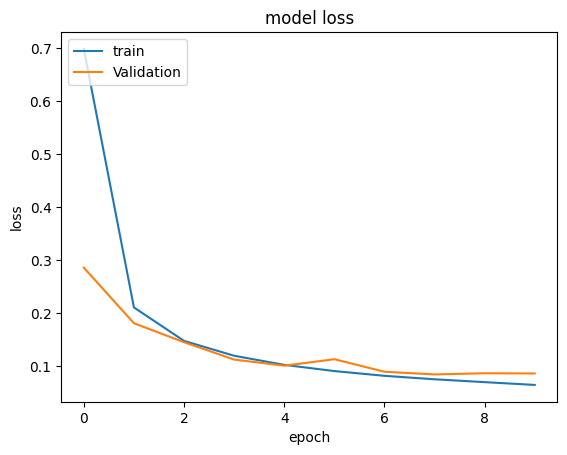

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

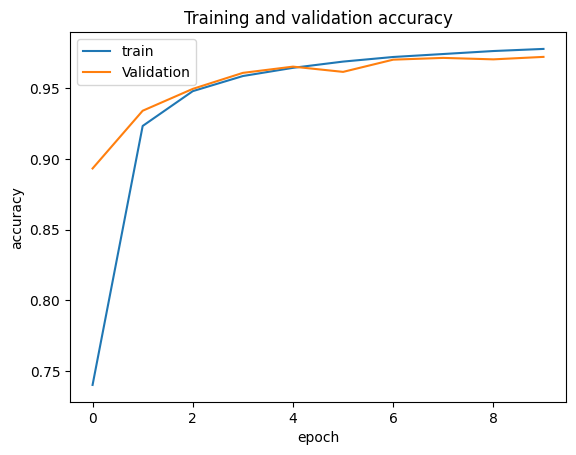

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [41]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

2681/2681 [==============================] - 6s 2ms/step


(85775, 1)

In [42]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]

# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_sequences(full_set, 25)
print(X_seq.shape, y_seq.shape)

(343171, 25, 21) (343171,)


In [43]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing',
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

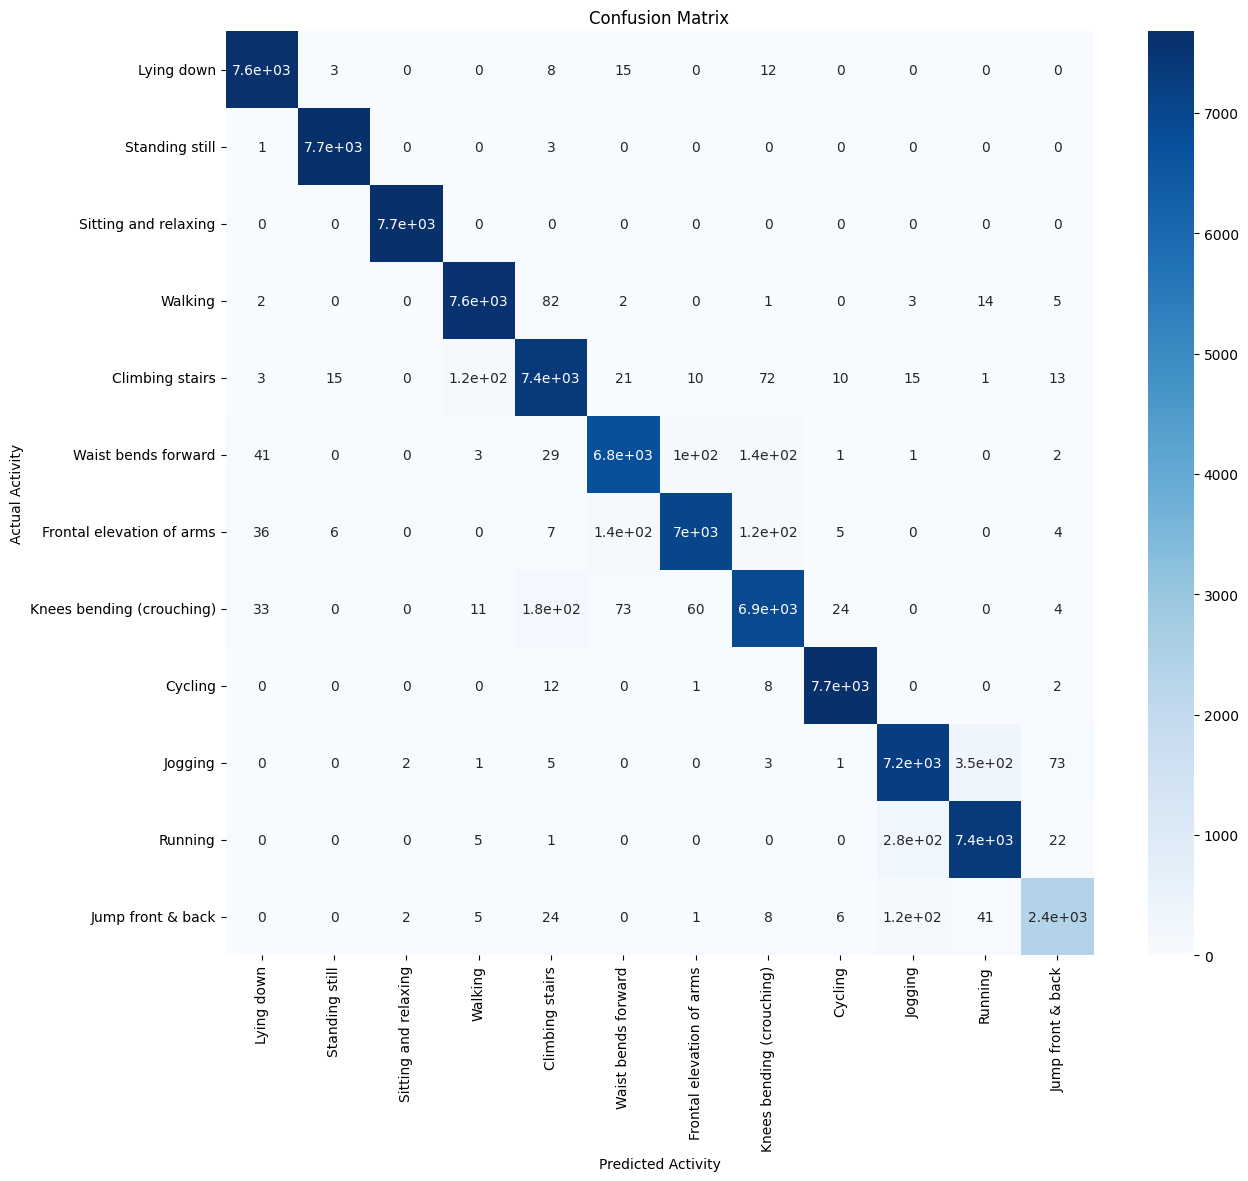

Accuracy Score: 97.1670%
Precision Score: 97.0350%
Recall Score: 96.8624%
F_1 Score: 96.9451%


In [44]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN4

In [45]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 23, 64)            4096      
                                                                 
 conv1d_7 (Conv1D)           (None, 21, 64)            12352     
                                                                 
 conv1d_8 (Conv1D)           (None, 19, 64)            12352     
                                                                 
 conv1d_9 (Conv1D)           (None, 17, 64)            12352     
                                                                 
 flatten_3 (Flatten)         (None, 1088)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               139392    
                                                                 
 dense_7 (Dense)             (None, 12)               

In [46]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
6032/6032 [==============================] - 44s 7ms/step - loss: 0.8283 - accuracy: 0.6964 - val_loss: 0.3418 - val_accuracy: 0.8750
Epoch 2/10
6032/6032 [==============================] - 41s 7ms/step - loss: 0.2667 - accuracy: 0.9039 - val_loss: 0.2031 - val_accuracy: 0.9281
Epoch 3/10
6032/6032 [==============================] - 38s 6ms/step - loss: 0.1810 - accuracy: 0.9363 - val_loss: 0.1485 - val_accuracy: 0.9490
Epoch 4/10
6032/6032 [==============================] - 39s 7ms/step - loss: 0.1406 - accuracy: 0.9511 - val_loss: 0.1419 - val_accuracy: 0.9528
Epoch 5/10
6032/6032 [==============================] - 38s 6ms/step - loss: 0.1180 - accuracy: 0.9596 - val_loss: 0.1213 - val_accuracy: 0.9584
Epoch 6/10
6032/6032 [==============================] - 38s 6ms/step - loss: 0.1045 - accuracy: 0.9641 - val_loss: 0.1084 - val_accuracy: 0.9634
Epoch 7/10
6032/6032 [==============================] - 42s 7ms/step - loss: 0.0946 - accuracy: 0.9677 - val_loss: 0.1042 - val_ac

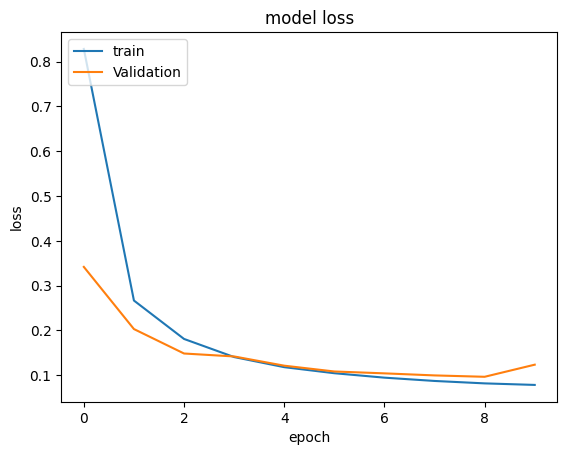

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

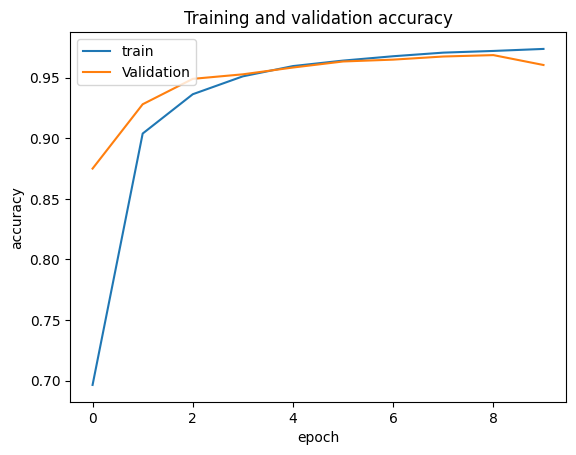

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [49]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

2681/2681 [==============================] - 6s 2ms/step


(85775, 1)

In [50]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]

# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_sequences(full_set, 25)
print(X_seq.shape, y_seq.shape)

(343171, 25, 21) (343171,)


In [51]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing',
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

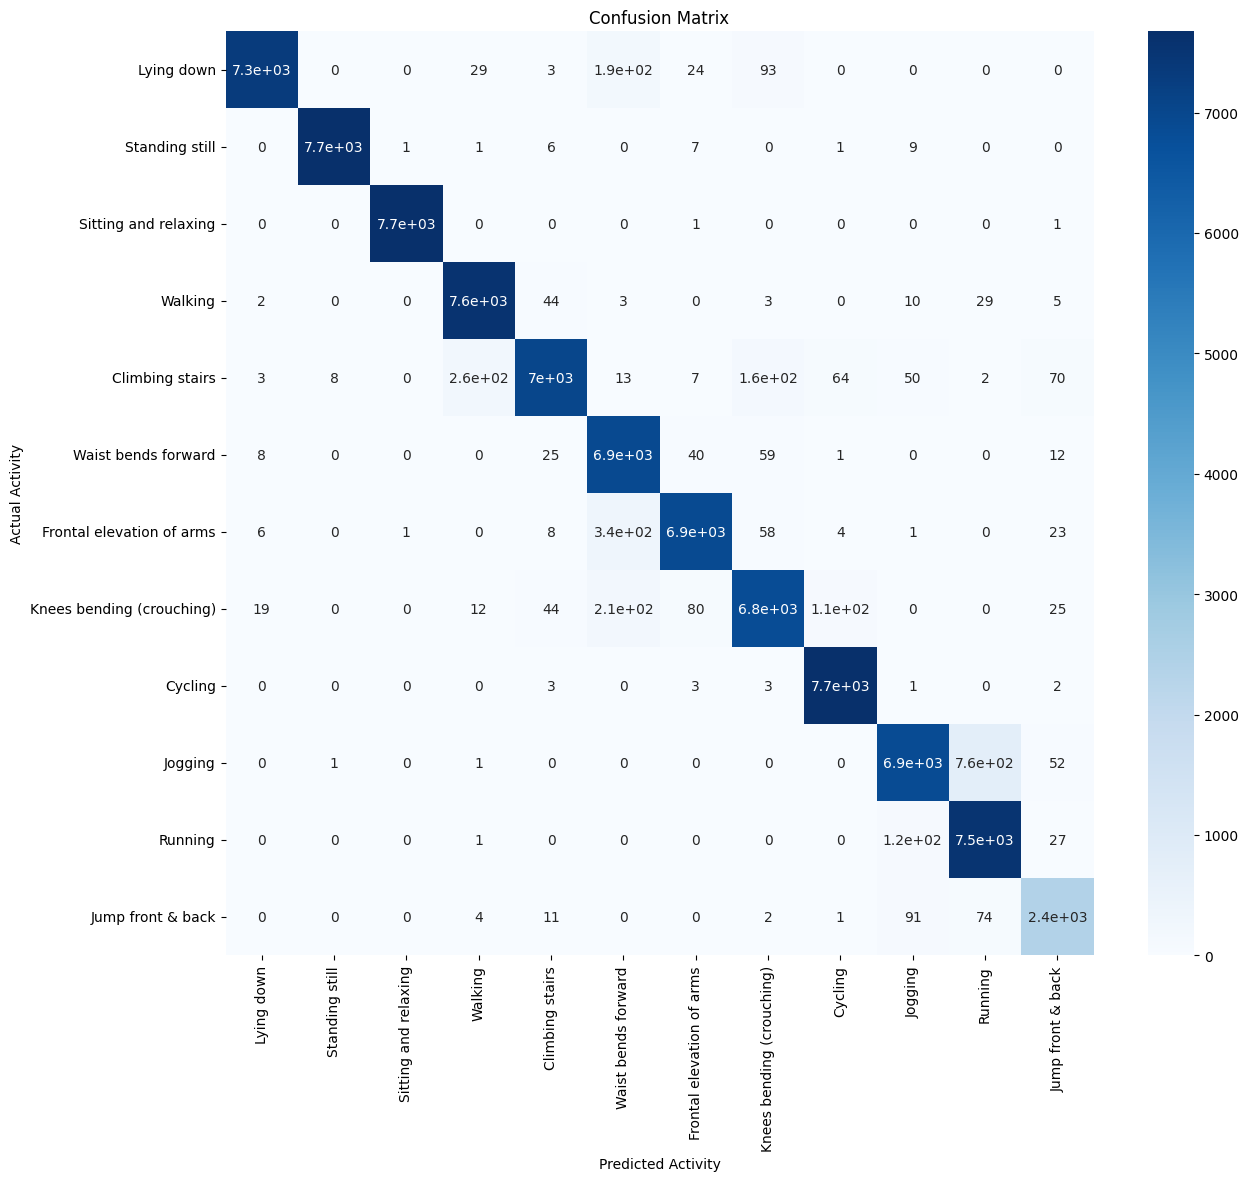

Accuracy Score: 96.1154%
Precision Score: 95.9456%
Recall Score: 95.9329%
F_1 Score: 95.8825%


In [52]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)